---

# CSCI 3352, Spring 2022
# FINAL PROJECT

<br> 

### Owen Smith, Kyle Ma

<br> 

In [36]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import math
import matplotlib
import matplotlib.pylab as plt
import csv

In [37]:
### ITERATE THROUGH NETWORKS DIRECTORY, HANDLE FILES ###
directory = 'networks'
for filename in os.scandir(directory):
    filename = filename.name
    name, ext = os.path.splitext(filename)
    ext = str(ext)[0:4]
    if ext == '.csv' and filename != 'references.csv':
        data = np.loadtxt(open(directory + '/' + filename, "rb"), delimiter=",", skiprows=1)
        edgelist = ''
        listfile = open(directory + '/' + filename[:-4] + '.txt', 'w')
        for row in range(0, len(data)):
            for col in range(0, len(data[row])):
                if data[row][col] != 0:
                    edgelist = edgelist + str(row) + ' ' + str(col) + '\n'
        d = listfile.write(edgelist)
        listfile.close()

In [53]:
# takes in a graph G and returns a list of network statistics
def gather_network_stats(G):
    def compute_MGD(G):
        path = list((dict(nx.all_pairs_shortest_path_length(G)).values())) #takes return and converts to list of dicts
        Z = 0
        l_sum = 0

        for node in path:
            tmp = list(node.values()) #convert node dict to list of values
            tmp.remove(0) #remove all instances of 0
            Z = Z + len(tmp) #calculate Z from size of list
            l_sum = l_sum + sum(tmp) #add all the path lengths to the total for the numerator later on

        MGD = l_sum / Z
        return MGD
    
    def percent_single_degree(G): #gets percentage of nodes with degree of one, as these edge suggest specialized predation
        degrees = dict(G.degree())
        degrees = list(degrees.values())
        single_degree_count = 0
        for k in degrees:
            if k == 1:
                single_degree_count += 1
        return single_degree_count / 

    def count_FFBL_motifs(G,flag):
        FFL_count = 0
        FBL_count = 0

        ### MY CODE ###
        FFL_pairs = [] #lists that will contain pairs for later printing if flag == 1
        FBL_pairs = []

        for i in G.nodes(): #loop for suggested enumeration
            for j in G.neighbors(i): #paths of length 1
                for k in G.neighbors(j): #paths of length 2
                    if (i != k): #eliminate bidirectionals
                        if (G.has_edge(i, k)): #if there is an edge from i -> k, it is a FFL
                            FFL_count += 1
                            FFL_pairs.append(((i,j), (j,k), (i,k)))
                        if (G.has_edge(k, i)): #if there is an edge from k -> i, it is a FBL
                            FBL_count += 1
                            FBL_pairs.append(((i,j), (j,k), (k,i)))

        FBL_count = int(FBL_count / 3) #divide FBL_count by 3 to retroactively account for duplicates

        if (flag == 1): #print flag
            for i in FFL_pairs:
                print("FFL: ", i)
            FBL_pairs = FBL_pairs[::3] #takes every third element to get rid of duplicates (kinda jank but it works)
            for i in FBL_pairs:
                print("FBL:", i)

        return (FFL_count,FBL_count)
    
    n = G.number_of_nodes() #builtin function that returns number of nodes as an int
    m = G.number_of_edges() #builtin funciton that reutnrs number of edges as an int
    
    degrees = dict(G.degree())
    totalDegrees = sum(degrees.values()) #get values, sum, divide by number of nodes
    kmean =  totalDegrees / n #calculate mean
    
    degree_lst = list(degrees.values())
    kmax = max(degree_lst)
    
    C = nx.transitivity(G)
    MGD = compute_MGD(G)
    triangles = nx.triangles(G)
    FFL_count, FBL_count = count_FFBL_motifs(G, 0)

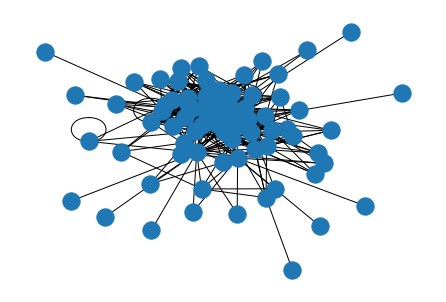

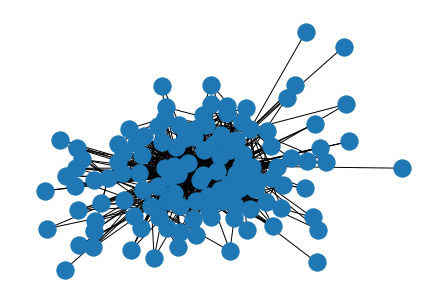

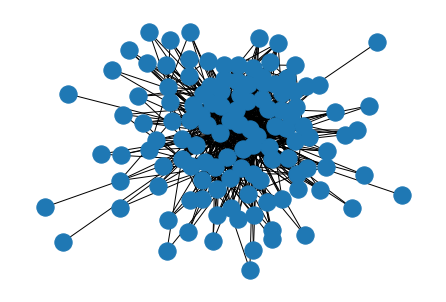

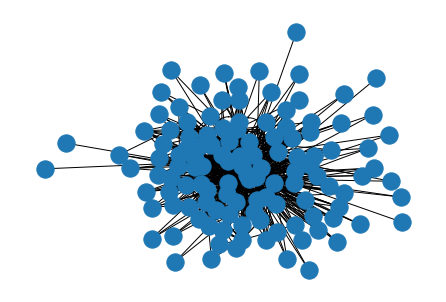

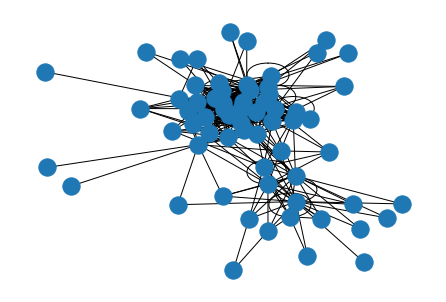

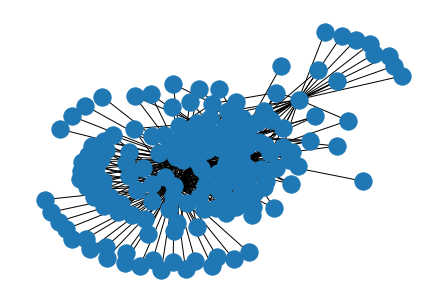

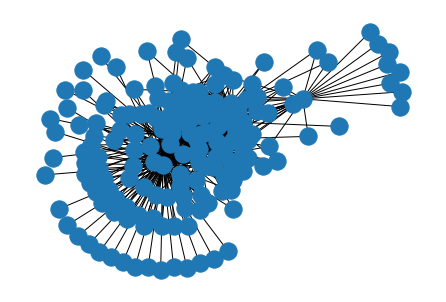

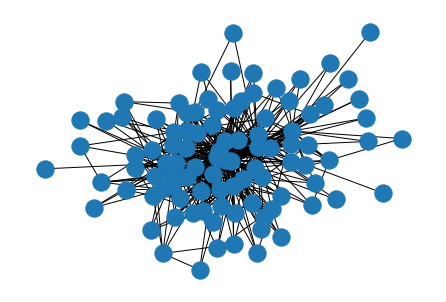

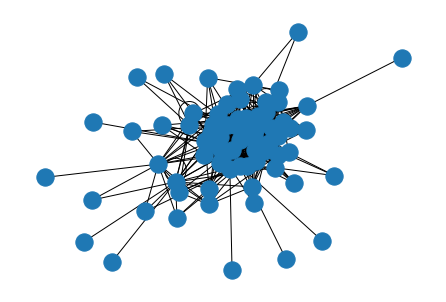

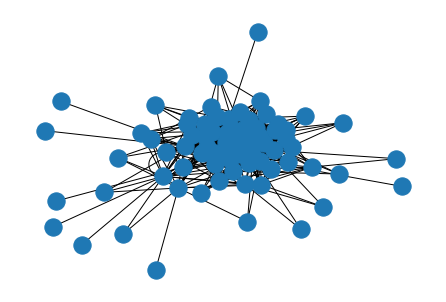

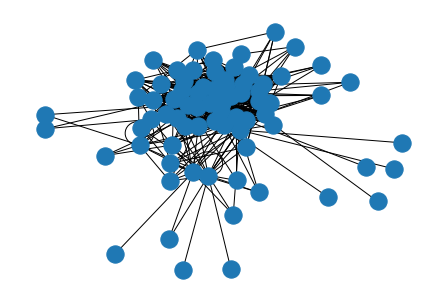

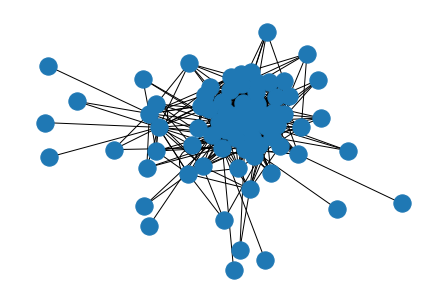

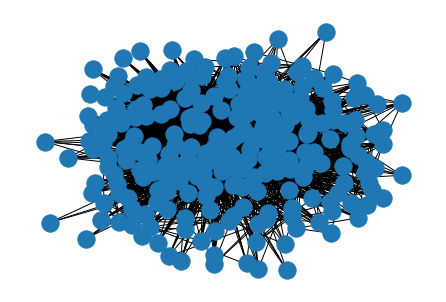

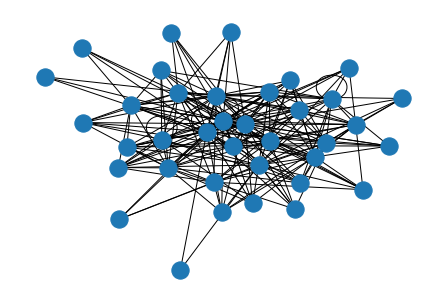

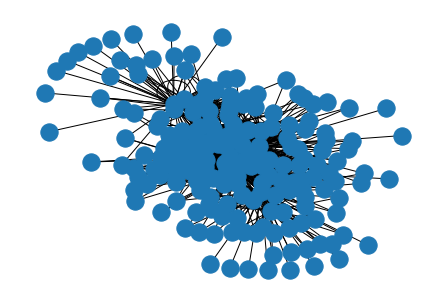

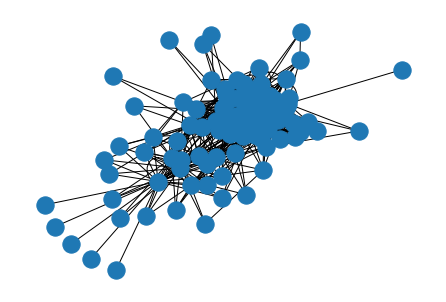

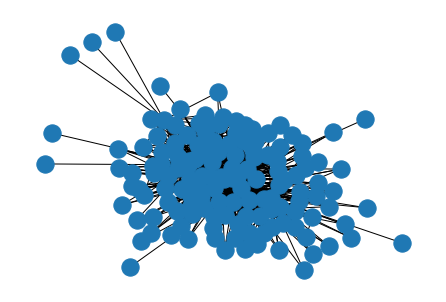

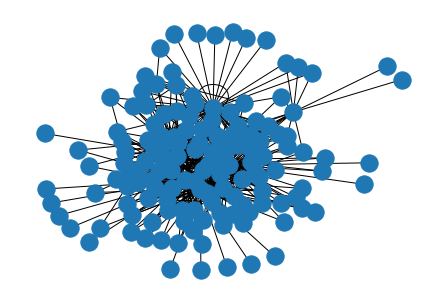

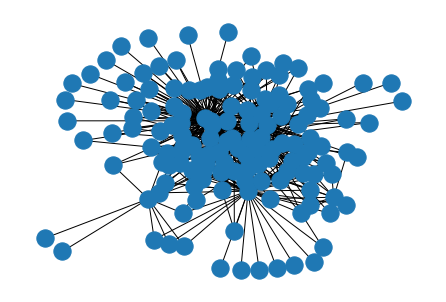

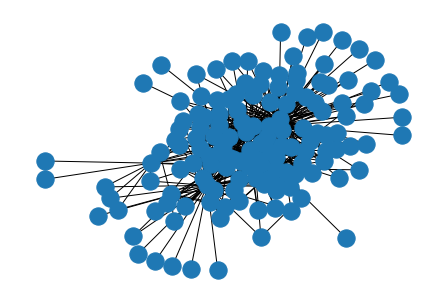

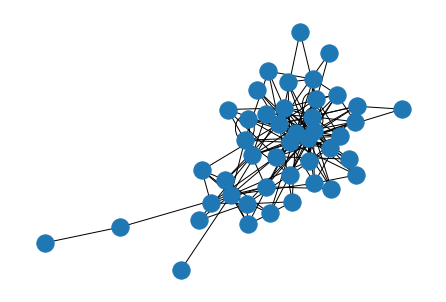

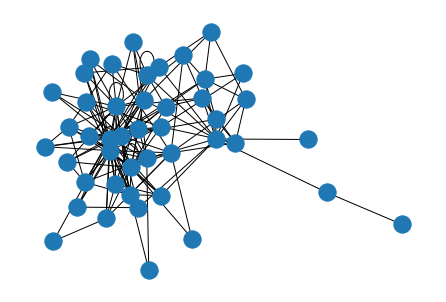

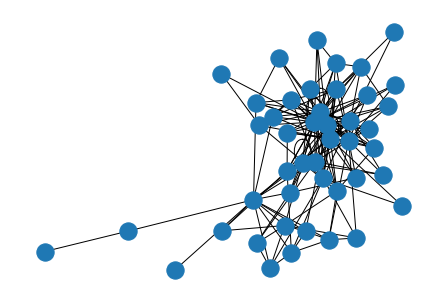

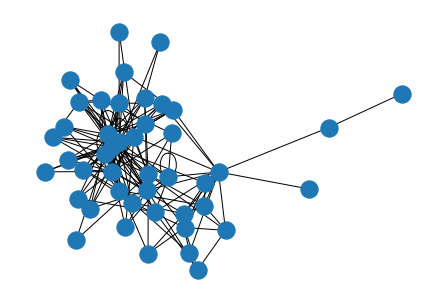

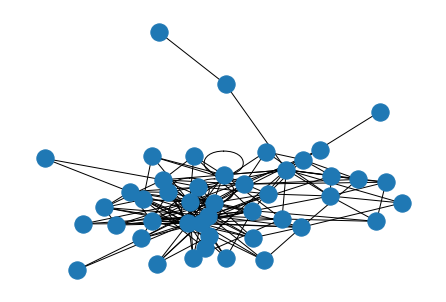

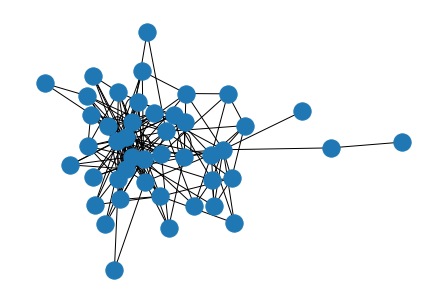

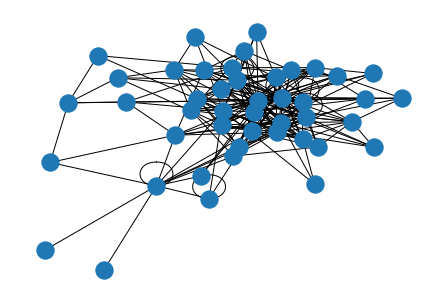

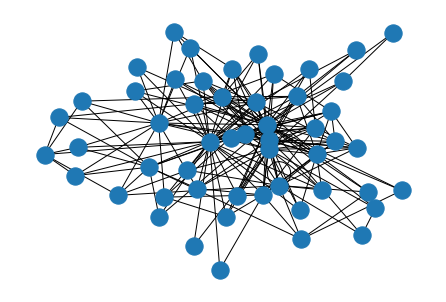

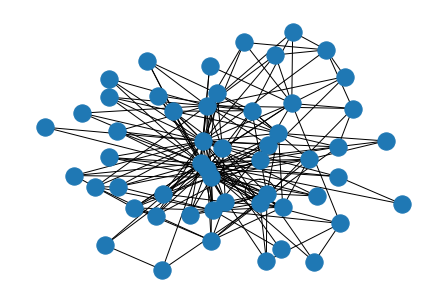

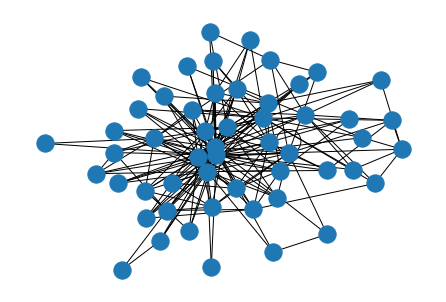

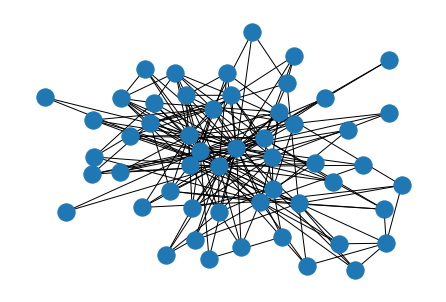

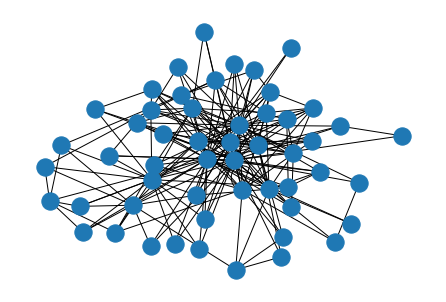

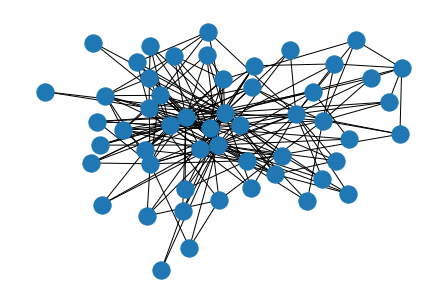

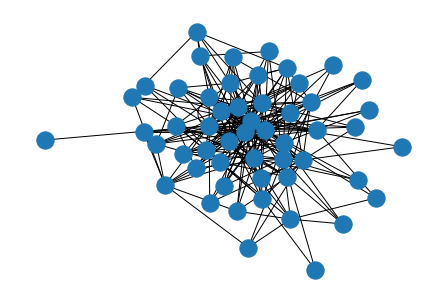

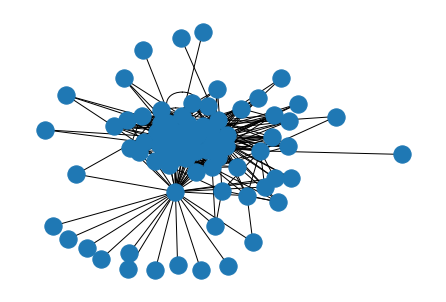

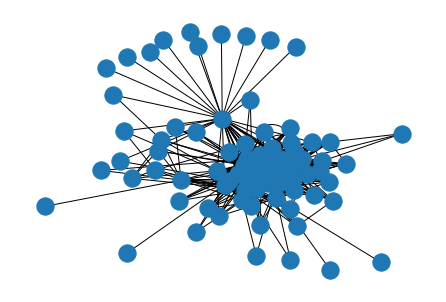

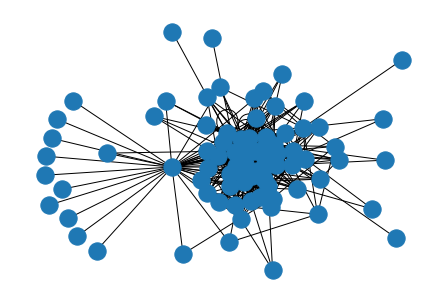

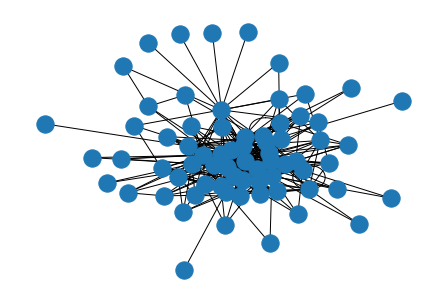

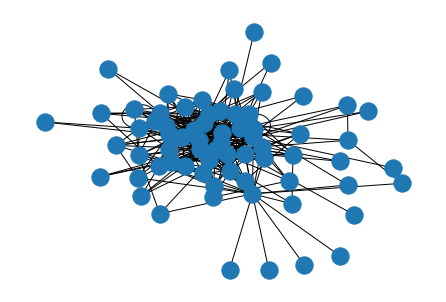

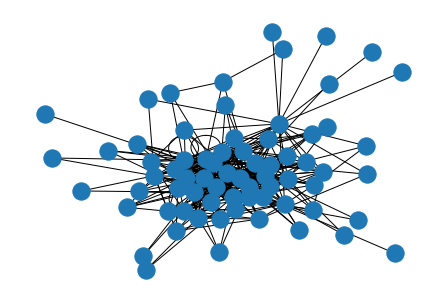

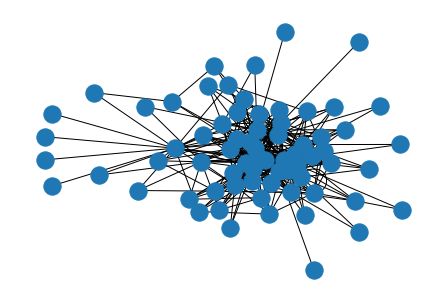

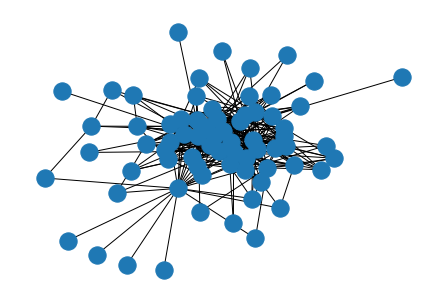

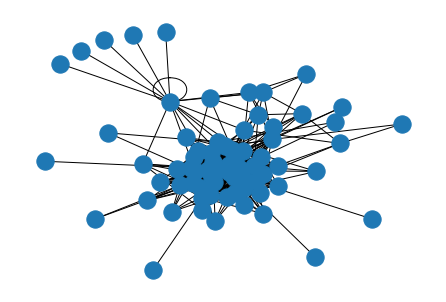

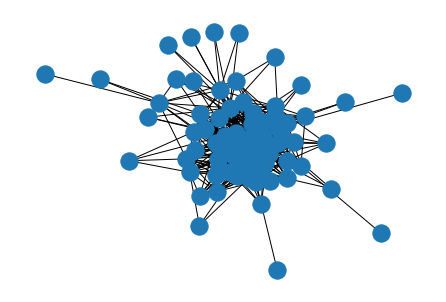

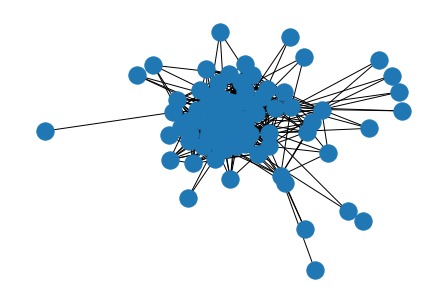

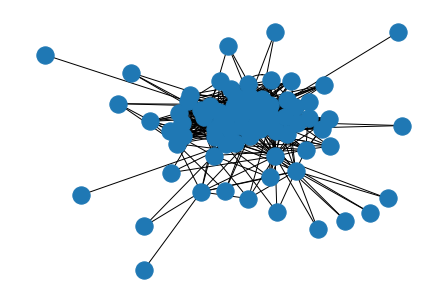

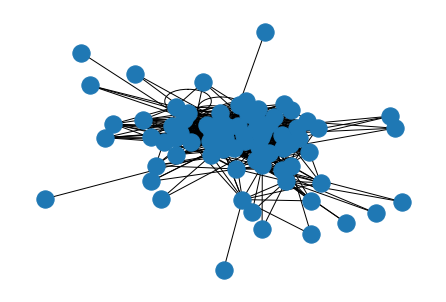

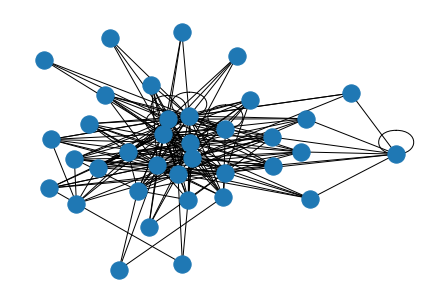

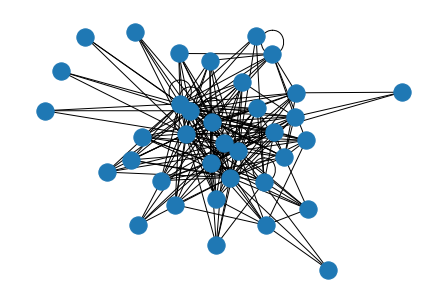

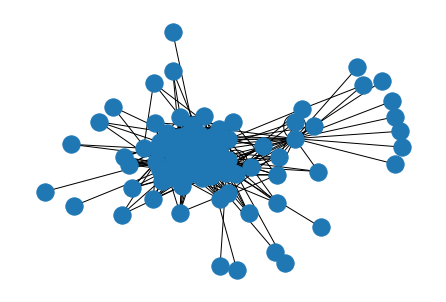

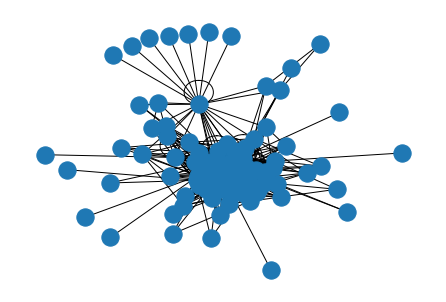

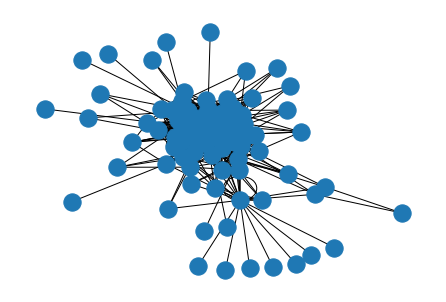

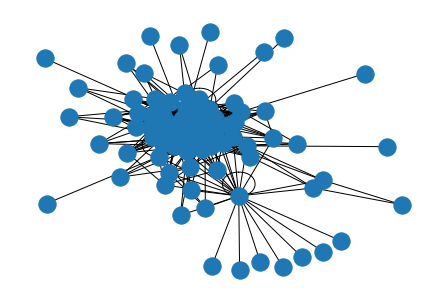

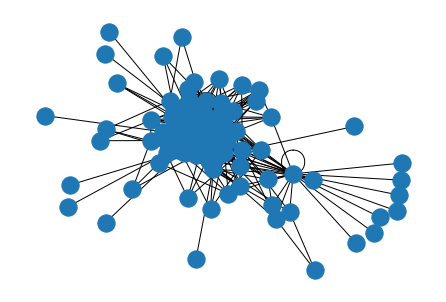

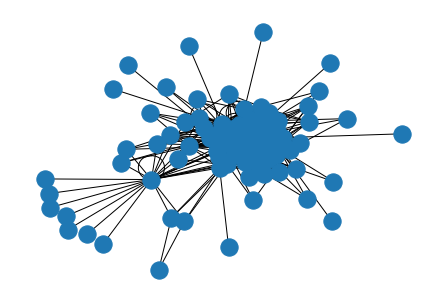

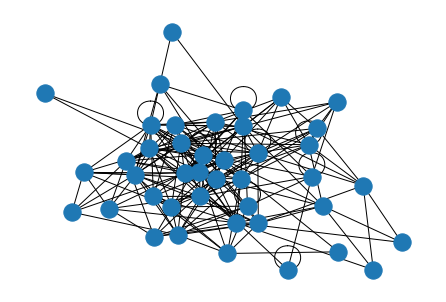

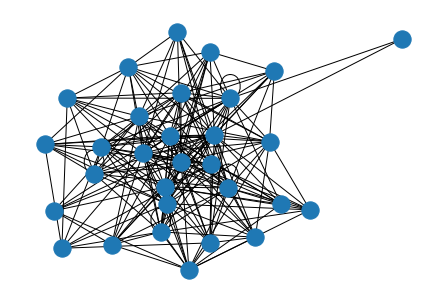

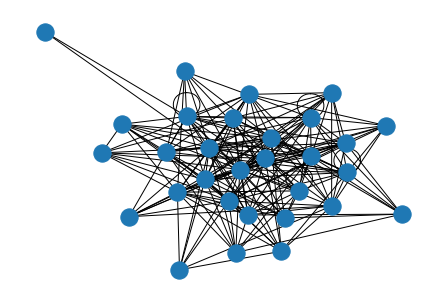

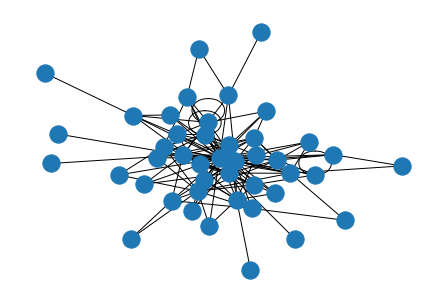

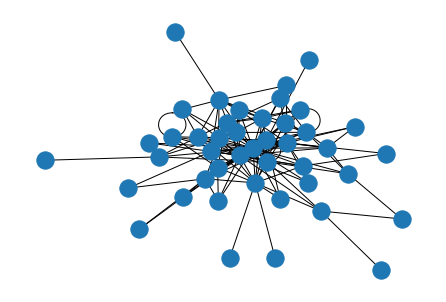

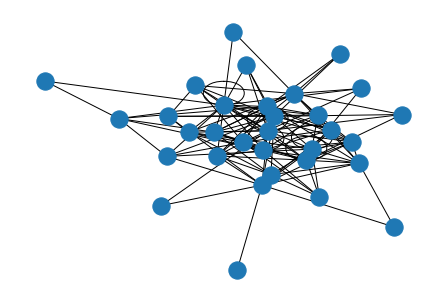

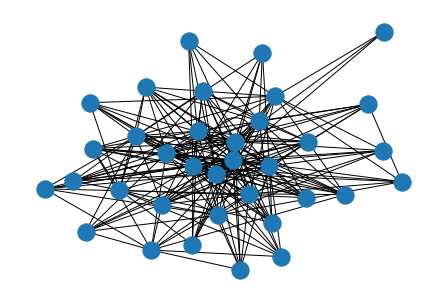

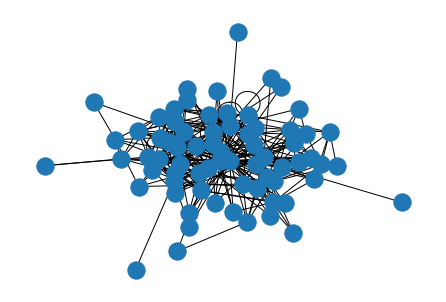

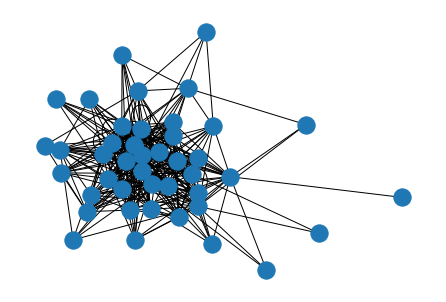

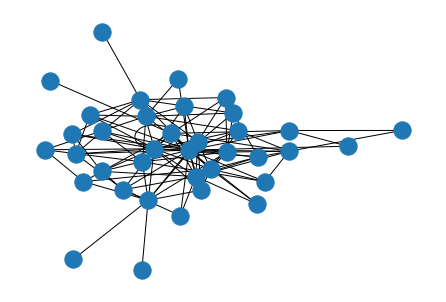

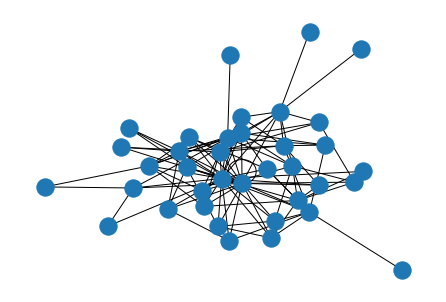

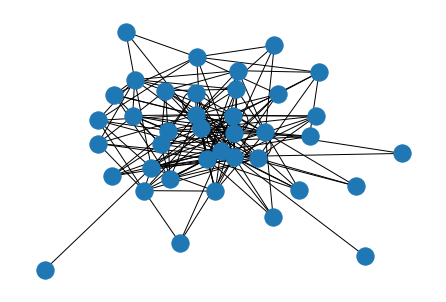

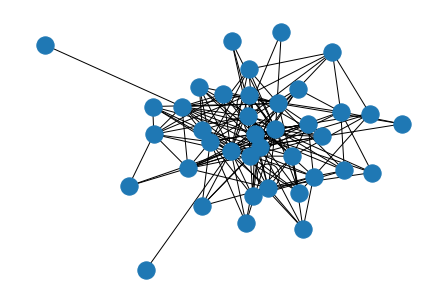

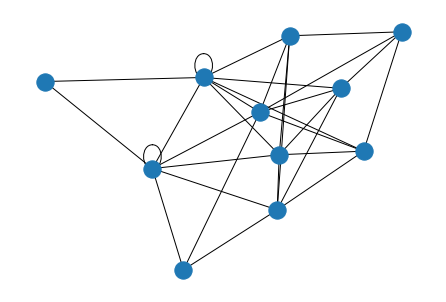

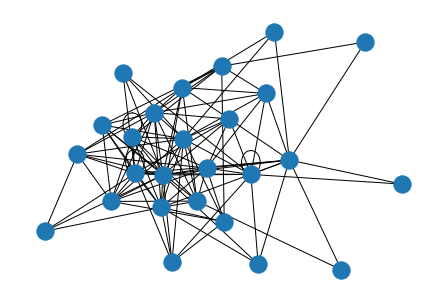

In [54]:
# iterates through networks directory and reads each in as networkx graph G
directory = 'networks'
for filename in os.scandir(directory):
    filename = filename.name
    name, ext = os.path.splitext(filename)
    ext = str(ext)[0:4]
    if ext == '.txt' and filename != 'README':
        G = nx.read_edgelist(directory + '/' + filename)
    network_stats = gather_network_stats(G)
    nx.draw(G)
    plt.show()